Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_mergesort.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

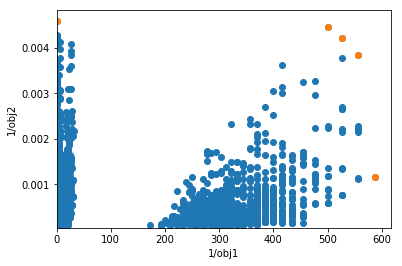

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

nan


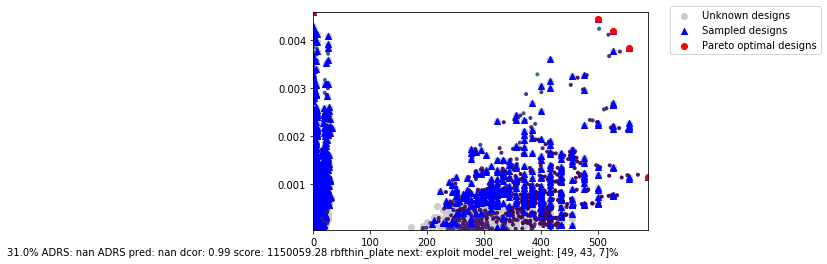

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([4921, 1138, 2085, ..., 3283, 1133, 2056], dtype=int64)